In [2]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#file path
csv_path = "../Resources/crimedata-33613-5yr.csv"
crime_data_df = pd.read_csv(csv_path)
crime_data_df.head(10)

,OBJECTID,Case Number,Crime Type,Crime Type Extension,Reported Date,Address,zip
0,854734,2016-281,DUI,DUI (DRIVING UNDER INFLUENCE),1/1/2016,FLORIDA AV N / WINDWOOD OAKS DR,33613
1,854771,2016-1464,TRAFFIC,Property Damage,1/1/2016,FLORIDA AV N / LAKE MAGDALENE BL,33549
2,854779,2016-1188,TRAFFIC,Property Damage,1/1/2016,BRUCE B DOWNS BL / 138TH AV E,33613
3,854780,2016-1268,TRAFFIC,Property Damage,1/1/2016,BRUCE B DOWNS BL / FLETCHER AV E,33613
4,854787,2015-849017,TRAFFIC,Property Damage,1/1/2016,15TH ST N / FLETCHER AV E,33612
5,854860,2016-1997,DRUGS,DRUGS/NARCOTICS,1/1/2016,BEARSS AV E / 17TH ST N,33549
6,854866,2016-60,BATTERY,BATTERY-SIMPLE,1/1/2016,13600 BLOCK GRAGSTON CR,33613
7,854929,2016-2990,BURGLARY,THEFT FROM A VEHICLE,1/2/2016,4000 BLOCK DREAM OAK PL,33613
8,854973,2016-2413,TRAFFIC,Non Incapacitating Injury,1/2/2016,FLETCHER AV E / BRUCE B DOWNS BL,33613
9,854977,2016-3345,THEFT,THEFT FROM A BUILDING,1/2/2016,13700 BLOCK 42ND ST N,33613


In [3]:
#identify columns names used in the data
crime_data_df.columns

Index(['OBJECTID', 'Case Number', 'Crime Type', 'Crime Type Extension',
       'Reported Date', 'Address', 'zip'],
      dtype='object')

In [4]:
#remove some columns from the data 
reduced_crime_data_df = crime_data_df.loc[:, ['Reported Date', 'Case Number', 'Crime Type', 'Crime Type Extension', 'Address'
       , 'zip']]
reduced_crime_data_df.head(10)

,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip
0,1/1/2016,2016-281,DUI,DUI (DRIVING UNDER INFLUENCE),FLORIDA AV N / WINDWOOD OAKS DR,33613
1,1/1/2016,2016-1464,TRAFFIC,Property Damage,FLORIDA AV N / LAKE MAGDALENE BL,33549
2,1/1/2016,2016-1188,TRAFFIC,Property Damage,BRUCE B DOWNS BL / 138TH AV E,33613
3,1/1/2016,2016-1268,TRAFFIC,Property Damage,BRUCE B DOWNS BL / FLETCHER AV E,33613
4,1/1/2016,2015-849017,TRAFFIC,Property Damage,15TH ST N / FLETCHER AV E,33612
5,1/1/2016,2016-1997,DRUGS,DRUGS/NARCOTICS,BEARSS AV E / 17TH ST N,33549
6,1/1/2016,2016-60,BATTERY,BATTERY-SIMPLE,13600 BLOCK GRAGSTON CR,33613
7,1/2/2016,2016-2990,BURGLARY,THEFT FROM A VEHICLE,4000 BLOCK DREAM OAK PL,33613
8,1/2/2016,2016-2413,TRAFFIC,Non Incapacitating Injury,FLETCHER AV E / BRUCE B DOWNS BL,33613
9,1/2/2016,2016-3345,THEFT,THEFT FROM A BUILDING,13700 BLOCK 42ND ST N,33613


In [6]:
#columns to use in the table below 
columns = [
    "Reported Date", "Case Number", "Crime Type", "Crime Type Extension", "Address", "zip"
]
#create a new DF for non Traffic related crimes
data_crime_no_traffic_df = reduced_crime_data_df.loc[reduced_crime_data_df["Crime Type"] != "TRAFFIC", columns]
data_crime_no_traffic_df_33613 = data_crime_no_traffic_df.loc[data_crime_no_traffic_df["zip"] == 33613, columns]
data_crime_no_traffic_df_33613


,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip
0,1/1/2016,2016-281,DUI,DUI (DRIVING UNDER INFLUENCE),FLORIDA AV N / WINDWOOD OAKS DR,33613
6,1/1/2016,2016-60,BATTERY,BATTERY-SIMPLE,13600 BLOCK GRAGSTON CR,33613
7,1/2/2016,2016-2990,BURGLARY,THEFT FROM A VEHICLE,4000 BLOCK DREAM OAK PL,33613
9,1/2/2016,2016-3345,THEFT,THEFT FROM A BUILDING,13700 BLOCK 42ND ST N,33613
10,1/2/2016,2016-3552,BATTERY,BATTERY-SIMPLE,14200 BLOCK NEBRASKA AV N,33613
...,...,...,...,...,...,...
14037,12/31/2020,2020-843700,FRAUD,FRAUD-OTHER,14800 BLOCK TULIP DR,33613
14039,12/31/2020,2020-845233,ASSAULT,AGGRAVATED ASSAULT,2000 BLOCK 140TH AV E,33613
14040,12/31/2020,2020-845233,BATTERY,BATTERY-SIMPLE,2000 BLOCK 140TH AV E,33613
14041,12/31/2020,2020-1503423,THEFT,THEFT OF BICYCLE,14200 BLOCK 42ND ST N,33613


In [7]:
#count all non traffic related crimes
data_crime_no_traffic_df_33613["Case Number"].count()

10453

In [8]:
#list of crimes and count
crime_type = data_crime_no_traffic_df_33613.groupby("Crime Type")
crime_type["Case Number"].count()

Crime Type
ARSON         12
ASSAULT      193
BATTERY     2339
BURGLARY    1316
DRUGS       1461
DUI          400
FIRE          21
FRAUD        746
HARASS        27
MISCHIEF     956
MURDER        13
ROBBERY      180
THEFT       2789
Name: Case Number, dtype: int64

In [9]:
#dates when a crime had been recorded
crime_date = data_crime_no_traffic_df_33613.groupby("Reported Date")
crime_date["Case Number"].count()

Reported Date
1/1/2016     2
1/1/2017    15
1/1/2018     8
1/1/2019     6
1/1/2020     8
            ..
9/9/2016     8
9/9/2017     3
9/9/2018     7
9/9/2019    10
9/9/2020     6
Name: Case Number, Length: 1816, dtype: int64

In [10]:
#build a year columns to count annual crimes on the following cells
data_crime_no_traffic_df_33613['year'] = pd.DatetimeIndex(data_crime_no_traffic_df_33613['Reported Date']).year
data_crime_no_traffic_df_33613.head()

,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip,year
0,1/1/2016,2016-281,DUI,DUI (DRIVING UNDER INFLUENCE),FLORIDA AV N / WINDWOOD OAKS DR,33613,2016
6,1/1/2016,2016-60,BATTERY,BATTERY-SIMPLE,13600 BLOCK GRAGSTON CR,33613,2016
7,1/2/2016,2016-2990,BURGLARY,THEFT FROM A VEHICLE,4000 BLOCK DREAM OAK PL,33613,2016
9,1/2/2016,2016-3345,THEFT,THEFT FROM A BUILDING,13700 BLOCK 42ND ST N,33613,2016
10,1/2/2016,2016-3552,BATTERY,BATTERY-SIMPLE,14200 BLOCK NEBRASKA AV N,33613,2016


In [11]:
#annual count of crimes recorded
crime_date_annual = data_crime_no_traffic_df_33613.groupby("year")
crime_date_annual["Case Number"].count()

year
2016    2329
2017    2334
2018    2024
2019    1908
2020    1858
Name: Case Number, dtype: int64

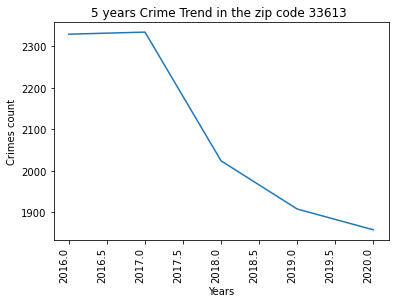

In [12]:
year =[2016,2017,2018,2019,2020]
crimes_count =[2329,2334,2024,1908,1858]

plt.plot(year,crimes_count)
plt.title('5 years Crime Trend in the zip code 33613 ')
plt.xlabel('Years')
plt.ylabel('Crimes count')
plt.xticks(rotation=90,  horizontalalignment='right', fontweight='light', fontsize='medium',)
plt.yticks(horizontalalignment='right')
plt.show()